## Analyse exploratoire des données

In [2]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LassoCV

In [3]:
train_data = pd.read_csv('../data/raw/train.csv')
super_train_data = pd.read_csv('../data/processed/superclasses.csv')

In [4]:
# Afficher les premières lignes
train_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [9]:
# Statistiques descriptives
train_data.drop('id', axis=1).describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


### Analyse des Valeurs Manquantes

In [10]:
# Vérifier les valeurs manquantes
train_data.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

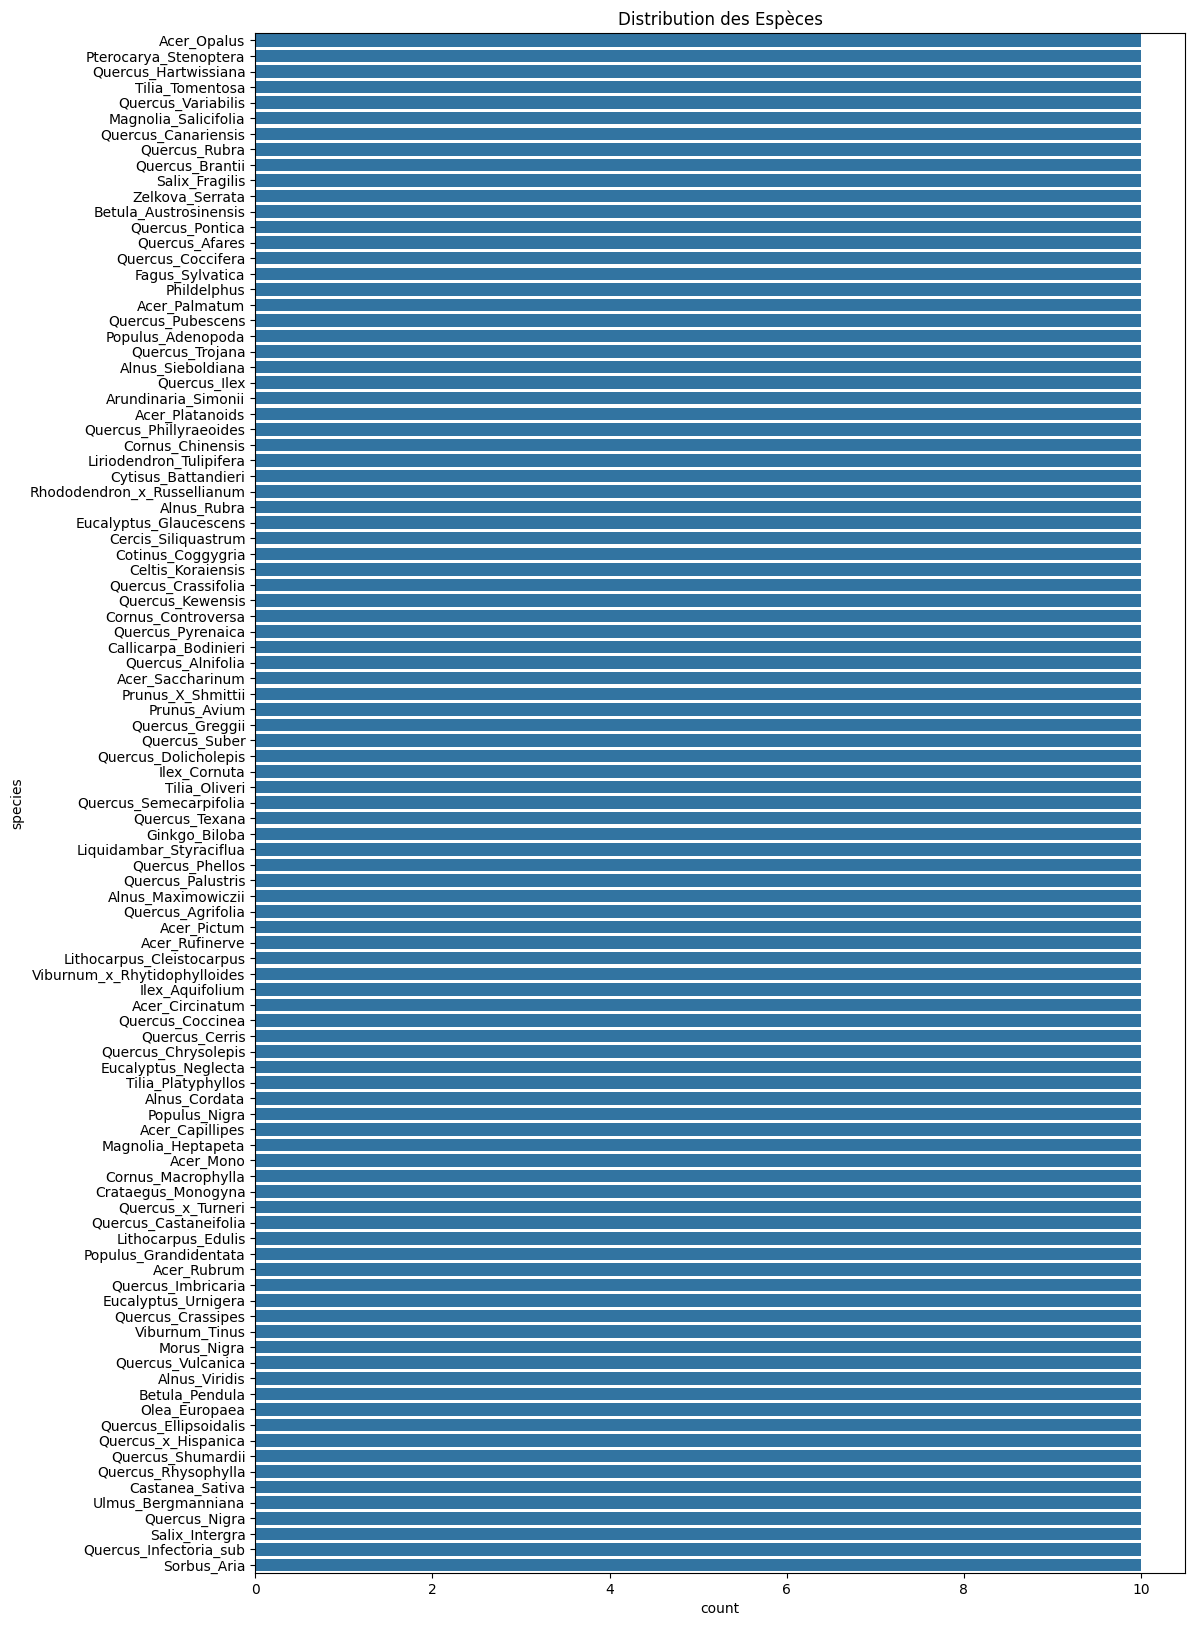

In [11]:
plt.figure(figsize=(12, 20))  # Augmentez la hauteur pour mieux afficher les étiquettes
sns.countplot(y='species', data=train_data)
plt.title('Distribution des Espèces')

# Save the plot to a file
plt.savefig("../graphs/distribution_especes.png")

# Show the plot
plt.show()

### Analyse des surclasses

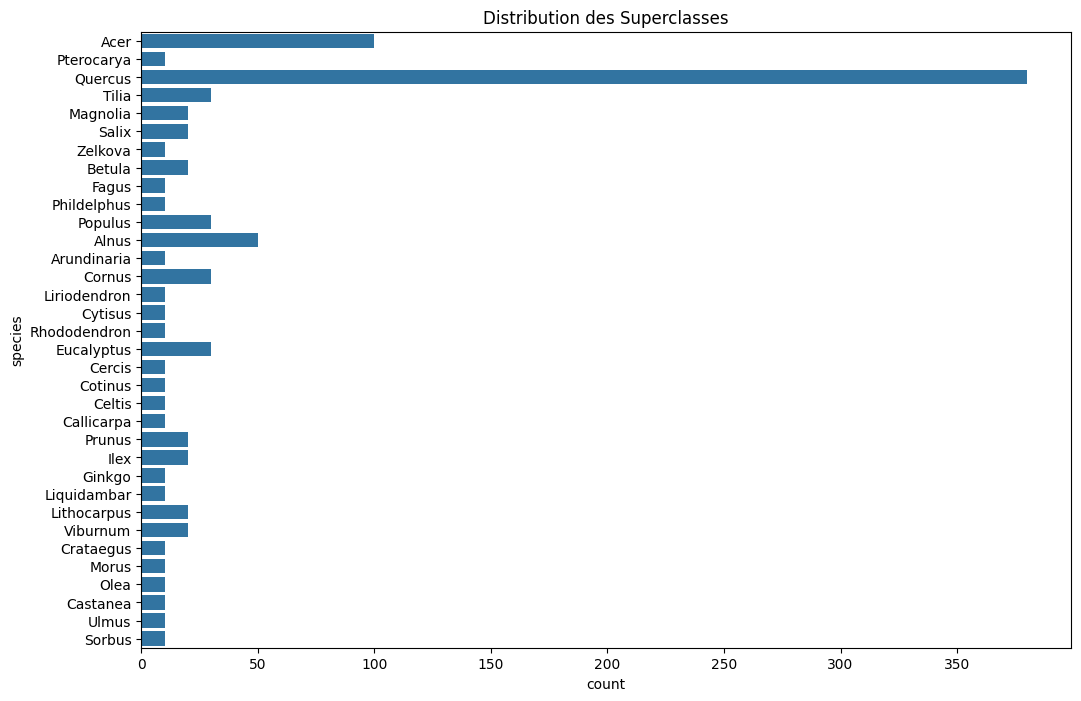

In [148]:

plt.figure(figsize=(12, 8))  # Augmentez la hauteur pour mieux afficher les étiquettes
sns.countplot(y='species', data=super_train_data)
plt.title('Distribution des Superclasses')

plt.savefig("../graphs/Distribution_des_Superclasses.png")


plt.show()

In [22]:
# Identifier les colonnes pour chaque groupe
margin_cols = [col for col in train_data.columns if 'margin' in col]
shape_cols = [col for col in train_data.columns if 'shape' in col]
texture_cols = [col for col in train_data.columns if 'texture' in col]

median_margin = train_data[margin_cols].median(axis=1)
median_shape = train_data[shape_cols].median(axis=1)
median_texture = train_data[texture_cols].median(axis=1)

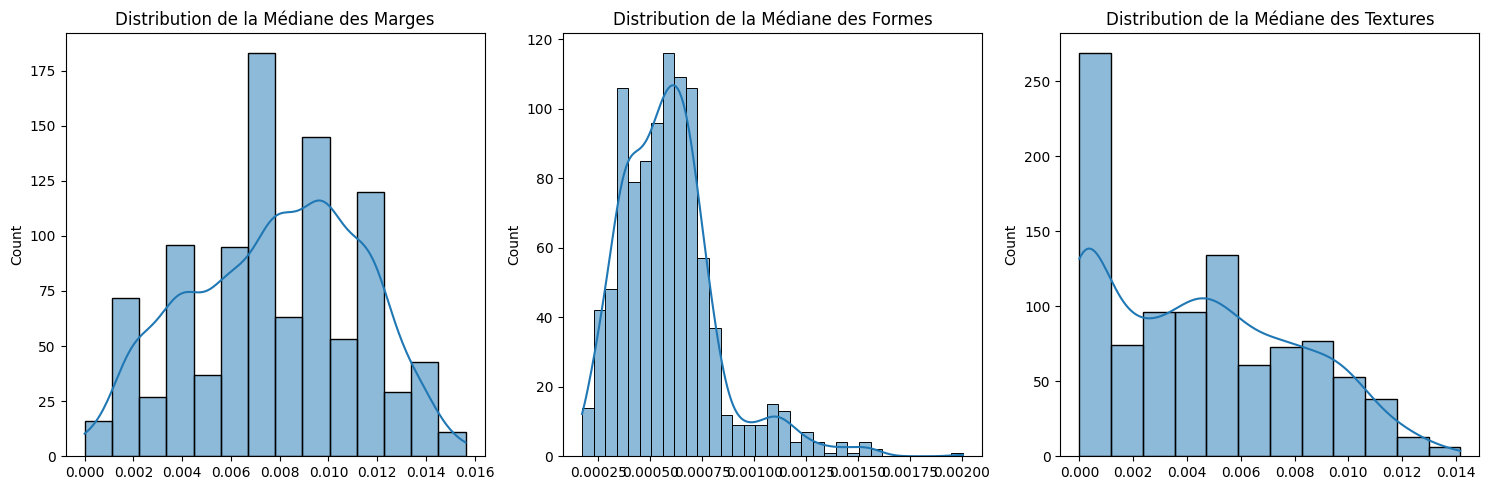

In [24]:

# Histogrammes des médianes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(median_margin, kde=True)
plt.title('Distribution de la Médiane des Marges')

plt.subplot(1, 3, 2)
sns.histplot(median_shape, kde=True)
plt.title('Distribution de la Médiane des Formes')

plt.subplot(1, 3, 3)
sns.histplot(median_texture, kde=True)
plt.title('Distribution de la Médiane des Textures')

plt.tight_layout()

plt.savefig("../graphs/Distribution_des_medianes.png")

plt.show()

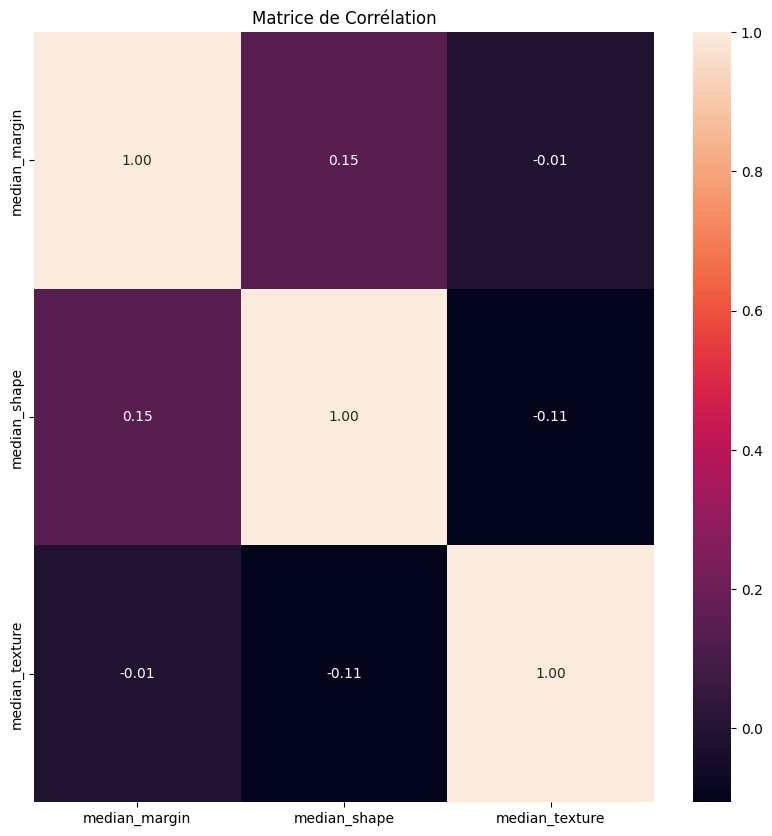

In [156]:
median_cols = pd.DataFrame({'median_margin': median_margin, 'median_shape': median_shape, 'median_texture': median_texture})
correlation_matrix = median_cols.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matrice de Corrélation')

plt.savefig("../graphs/Matrice_de_Corrélation.png")

plt.show()

In [57]:
import pandas as pd

# Supposons que train_data est votre DataFrame original
train_data_shape = train_data.filter(regex='^shape')
train_data_texture = train_data.filter(regex='^texture')
train_data_margin = train_data.filter(regex='^margin')

# Fusionner les groupes deux par deux
shape_texture = pd.concat([train_data_shape, train_data_texture], axis=1)
shape_margin = pd.concat([train_data_shape, train_data_margin], axis=1)
texture_margin = pd.concat([train_data_texture, train_data_margin], axis=1)

# Fonction pour calculer la moyenne des valeurs de corrélation hors de la diagonale
def mean_corr_within_group(corr_matrix):
    corr_matrix = corr_matrix.abs()
    np.fill_diagonal(corr_matrix.values, 0)
    return corr_matrix.mean().mean()

# Fonction pour calculer la moyenne des valeurs de corrélation entre deux groupes
def mean_corr_between_groups(corr_matrix, group1, group2):
    corr_values = []
    for col in group1:
        for row in group2:
            corr_values.append(abs(corr_matrix.loc[row, col]))
    return sum(corr_values) / len(corr_values)

# Calculer les moyennes pour chaque groupe
mean_corr_shape = mean_corr_within_group(train_data_shape.corr()) * 100
mean_corr_texture = mean_corr_within_group(train_data_texture.corr()) * 100
mean_corr_margin = mean_corr_within_group(train_data_margin.corr()) * 100

# Calculer les moyennes entre les groupes
mean_corr_shape_texture = mean_corr_between_groups(shape_texture.corr(), train_data_shape.columns, train_data_texture.columns) * 100
mean_corr_shape_margin = mean_corr_between_groups(shape_margin.corr(), train_data_shape.columns, train_data_margin.columns) * 100
mean_corr_texture_margin = mean_corr_between_groups(texture_margin.corr(), train_data_texture.columns, train_data_margin.columns) * 100

# Créer un DataFrame pour les moyennes
correlation_summary = pd.DataFrame({
    'Combination': ['Shape', 'Texture', 'Margin', 'Shape-Texture', 'Shape-Margin', 'Texture-Margin'],
    'Mean Correlation (%)': [mean_corr_shape, mean_corr_texture, mean_corr_margin, mean_corr_shape_texture, mean_corr_shape_margin, mean_corr_texture_margin]
})

# Trier le DataFrame par "Mean Correlation (%)" en ordre décroissant
correlation_summary = correlation_summary.sort_values(by='Mean Correlation (%)', ascending=False)

# Afficher le DataFrame
correlation_summary

,Combination,Mean Correlation (%)
0,Shape,68.864458
2,Margin,25.653617
1,Texture,15.866776
5,Texture-Margin,7.806652
4,Shape-Margin,6.745317
3,Shape-Texture,5.475600


In [48]:
# Calculate the correlation matrix
corr_matrix = train_data.drop(['id', 'species'], axis=1).corr()

# Filter the correlation matrix using the mask
filtered_corr_matrix = corr_matrix[mask]

# Drop rows and columns with all NaN values (these are the ones that didn't meet the threshold)
filtered_corr_matrix = filtered_corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Create a set to store the unique combinations of column pairs
unique_combinations = set()

# Create a list to store the dictionaries
correlation_list = []

for column1 in filtered_corr_matrix.columns:
    for column2 in filtered_corr_matrix.index:
        if column1 != column2:
            percentage = filtered_corr_matrix.loc[column2, column1]
            if abs(percentage) > 0.9:  # Filter out rows beneath the threshold
                combination = frozenset([column1, column2])
                if combination not in unique_combinations:
                    unique_combinations.add(combination)
                    correlation_list.append({'Column 1': column1, 'Column 2': column2, 'Percentage': percentage})

# Create the DataFrame using the list of dictionaries
correlation_df = pd.DataFrame(correlation_list, columns=['Column 1', 'Column 2', 'Percentage'])

# Sort the DataFrame by the "Percentage" column in descending order
correlation_df = correlation_df.sort_values(by='Percentage', ascending=False)

# Display the dataframe
correlation_df.to_csv('correlation_data.csv', index=False)


### Normalisation des données

#### Z-Score

In [91]:
from sklearn.preprocessing import StandardScaler

# Initialiser le StandardScaler
scaler = StandardScaler()

# Sélectionner les colonnes numériques à normaliser
numeric_columns = [col for col in train_data.columns if col not in ['id', 'species']]
numeric_data_without_id_species = train_data[numeric_columns]

# Ajuster et transformer les données
normalized_data_z_score = scaler.fit_transform(numeric_data_without_id_species)

# Créer un DataFrame avec les données normalisées
normalized_data_z_score = pd.DataFrame(normalized_data_z_score, columns=numeric_columns)

# Ajouter les colonnes 'id' et 'species' au DataFrame normalisé
normalized_data_z_score[['id', 'species']] = train_data[['id', 'species']]

normalized_data_z_score = normalized_data_z_score[['id', 'species'] + numeric_columns]

normalized_data_z_score.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,-0.486611,-0.131357,-0.330956,-0.682244,-0.138444,-0.554066,0.465218,-0.395064,...,-0.452710,-0.260149,-0.560872,-0.345848,1.242752,-0.233151,-0.235610,-0.394871,-0.652143,0.262397
1,2,Pterocarya_Stenoptera,-0.585602,-0.734880,-0.028561,-0.269558,0.605389,-0.704306,0.018812,-0.395064,...,-0.560567,-0.260149,-0.687151,-0.423884,0.478218,-0.233151,-0.235610,-0.494974,2.181670,0.133641
2,3,Quercus_Hartwissiana,-0.585602,-0.483408,-0.482192,-0.544694,-0.563515,-0.629196,2.808662,-0.395064,...,1.858873,-0.260149,-0.434636,-0.423884,-0.541291,-0.233151,-0.235610,-0.520012,0.835641,-0.724631
3,5,Tilia_Tomentosa,-0.882575,-0.634302,-0.330956,-0.613469,0.392826,-0.366289,0.242044,-0.395064,...,-0.575984,-0.209558,-0.687151,-0.462921,0.287052,-0.233151,-0.235610,-0.069525,-0.652143,1.249425
4,6,Quercus_Variabilis,-0.585602,-0.634302,0.651866,-0.475883,-0.032190,-0.441400,-0.762355,-0.395064,...,0.949628,-0.260149,0.238782,-0.462921,-1.050981,-0.233151,-0.235610,-0.520012,-0.652143,0.519866
5,8,Magnolia_Salicifolia,2.681310,1.679162,0.047038,-0.751019,-0.776023,2.187571,-0.650767,-0.395064,...,1.720166,-0.260149,1.122652,-0.462921,-0.668714,-0.233151,-0.235610,-0.520012,-0.510460,-0.252584
6,10,Quercus_Canariensis,0.206378,0.069800,-0.557791,-0.475883,-0.669769,0.084414,1.134741,-0.395064,...,0.780119,-0.260149,1.038480,-0.462921,-0.413804,-0.233151,-0.235610,-0.520012,2.181670,-0.681742
7,11,Quercus_Rubra,-0.882575,-0.734880,0.198235,0.968464,-0.563515,-0.741862,-0.873942,-0.395064,...,0.025014,1.054663,-0.266249,-0.345848,0.350730,-0.233151,3.017059,-0.344820,-0.439582,0.734445
8,14,Quercus_Brantii,-0.585602,-0.684591,0.047038,-0.269558,-0.669769,-0.741862,0.242044,-0.395064,...,-0.575984,-0.260149,-0.308356,-0.462921,0.095886,-0.233151,-0.235610,-0.494974,1.756620,2.408099
9,15,Salix_Fragilis,-0.882575,-0.734880,-0.860185,0.487003,3.155651,-0.741862,-1.097116,-0.395064,...,-0.575984,-0.260149,-0.687151,2.346503,-0.158959,2.966760,-0.235610,1.382064,-0.652143,-0.853387


In [92]:
# Save the filtered data to a new CSV file with
filename = f"../data/processed/data_normalisee.csv"
normalized_data_z_score.to_csv(filename, index=False)

### Detection des outliers

In [157]:
numeric_data = train_data.select_dtypes(include=[np.number]).drop(columns=['id'])

# Créer et ajuster le modèle
iso_forest = IsolationForest(contamination=0.01)  # 1% des données considérées comme outliers
iso_forest.fit(numeric_data)

# Prédictions
outliers_iso_forest = iso_forest.predict(numeric_data)

# Identifier les lignes qui sont des outliers
outlier_rows = np.where(outliers_iso_forest == -1)

In [98]:
# Calculate the percentage of outliers
outlier_percentage = len(outlier_rows[0]) / len(train_data) * 100

# Remove outlier rows
filtered_data = train_data.drop(outlier_rows[0])

# Save the filtered data to a new CSV file with the percentage in the name
filename = f"../data/processed/data_no_outliers_{outlier_percentage:.0f}%.csv"
filtered_data.to_csv(filename, index=False)

In [99]:
normalized_data_without_outliers = normalized_data_z_score.drop(outlier_rows[0])

# Write to CSV
normalized_data_without_outliers.to_csv('../data/processed/data_without_outliers_and_normalized.csv', index=False)

### ACP

In [135]:
def pca(n_components):
    # Initialize PCA with the desired number of components
    pca = PCA(n_components)

    # Fit and transform the data
    pca_data = pca.fit_transform(numeric_data)

    # Create a DataFrame with the PCA results
    pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

    # Add the 'id' and 'species' columns to the PCA DataFrame
    pca_df[['id', 'species']] = train_data[['id', 'species']]

    # Reorder the columns
    pca_df = pca_df[['id', 'species'] + [f'PC{i+1}' for i in range(n_components)]]

    # Write to CSV
    pca_df.to_csv('../data/processed/data_pca.csv', index=False)
    
    return pca_df

In [158]:
pca(68)

,id,species,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68
0,1,Acer_Opalus,-0.034391,-0.044043,-0.078234,0.015091,0.014542,0.026259,0.012217,0.043066,...,-0.008557,-0.003871,-0.008197,-0.001021,0.003668,-0.001598,0.009925,0.003330,-0.007043,-0.008619
1,2,Pterocarya_Stenoptera,-0.098290,-0.076697,-0.016510,-0.018842,-0.009512,0.006152,0.028564,0.048211,...,-0.000533,0.015962,-0.001211,0.001659,-0.009611,0.004221,0.008702,0.002913,-0.009116,0.002588
2,3,Quercus_Hartwissiana,0.087150,-0.084009,0.072021,-0.018492,0.038819,0.024141,-0.074831,0.049646,...,0.003906,0.000924,-0.001194,0.005902,0.003534,-0.013230,-0.011614,-0.000344,-0.003657,-0.002099
3,5,Tilia_Tomentosa,-0.095144,-0.087834,-0.069639,-0.005416,0.067378,0.055953,0.079994,0.033601,...,0.001690,0.004287,0.010655,-0.007831,-0.011450,-0.005779,0.006530,-0.008860,0.007973,-0.003757
4,6,Quercus_Variabilis,0.087992,-0.079204,0.014859,0.016285,0.086109,-0.009683,-0.083320,-0.013338,...,-0.024529,-0.010456,-0.010062,-0.004275,0.008088,-0.013906,-0.002737,-0.004435,-0.000513,0.002026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1575,Magnolia_Salicifolia,0.286150,0.082295,0.096107,-0.131990,0.023139,0.078332,0.031647,0.023917,...,0.004981,0.010039,-0.011086,-0.001397,0.001704,-0.000029,-0.000906,-0.001584,-0.009282,-0.000450
986,1578,Acer_Pictum,0.122388,-0.042799,0.014139,-0.010764,0.055061,-0.076911,0.033055,-0.147826,...,0.006545,0.013962,-0.002217,0.001356,-0.008106,-0.010513,0.002890,-0.004205,-0.004961,0.001824
987,1581,Alnus_Maximowiczii,-0.117738,-0.055298,0.051162,-0.018249,-0.028137,0.034693,-0.003978,0.019977,...,-0.004982,-0.015020,0.020165,0.029649,0.011293,0.024196,0.002508,0.004822,-0.012053,-0.014217
988,1582,Quercus_Rubra,0.050874,-0.050419,0.068655,0.014190,-0.008632,-0.110476,-0.009652,-0.126982,...,-0.005940,-0.009981,0.004527,-0.016674,0.010729,0.019807,-0.006861,-0.011374,-0.010094,0.007778
